In [1]:
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [2]:
df_pre = pd.read_csv('../Datasets/data/pre_study_questionnaire_updated.csv', sep=",")
df = pd.read_csv('../Datasets/data/post_study_questionnaire_updated.csv', sep=",")
rg_df = pd.read_csv('../Datasets/data/field_data_field_research_group_updated.csv', sep=",")

In [3]:
rg_df = rg_df.drop(['entity_type', 'bundle', 'deleted', 'revision_id', 'language', 'delta'], axis=1)


In [4]:
df = df.drop_duplicates(subset=['UID']) 

In [5]:
df = df[df['Serienummer']>7]

In [6]:
result_df = pd.merge(df,rg_df,how='inner', left_on='UID',right_on='entity_id')

In [7]:
grade_df = df_pre[['UID', 'In welk leerjaar zit je?']]
grade_df.head()

,UID,In welk leerjaar zit je?
0,1846,Anders
1,1847,Anders
2,1854,Anders
3,1864,Anders
4,1865,Anders


In [8]:
result_df = pd.merge(result_df,grade_df,how='inner',left_on='UID',right_on='UID')
result_df = result_df.drop_duplicates(subset=['UID']) 

In [9]:
result_df = result_df[result_df['In welk leerjaar zit je?']!=" Anders"]

In [10]:
real_df = result_df[result_df["field_research_group_value"]==0]
placebo_df = result_df[result_df["field_research_group_value"]==1]
nothing_df = result_df[result_df["field_research_group_value"]==2]

In [11]:
q1 = '1. Wiski is zoals een expert (bv. een leerkracht) in wiskunde-oefeningen aanraden.'
q2 = '2. Wiski heeft de expertise (kennis) om mijn wiskundeniveau te kunnen inschatten.'
q3 = '3. Wiski kan mijn wiskundeniveau inschatten.'
q4 = '4. Wiski begrijpt de moeilijkheidsgraad van wiskunde-oefeningen goed.'
q5 = '5. Wiski houdt rekening met mijn wiskundeniveau om oefeningen aan te raden.'
q6 = '6. Wiski zet op de eerste plaats dat ik vorderingen maak in wiskunde.'
q7 = '7. Wanneer Wiski oefeningen aanraadt, doet Wiski dat zodat ik vorderingen maak in wiskunde.'
q8 = '8. Wiski wilt mijn wiskundeniveau goed inschatten.'
q9 = '9. Wiski raadt oefeningen op een zo correct mogelijke manier aan.'
q10 = '10. Wiski is eerlijk.'
q11 = '11. Wiski maakt oprechte aanbevelingen.'
q12 = '12. Ik vertrouw Wiski om mij wiskunde-oefeningen aan te raden.'
q13 = '13. Als ik nog eens online wiskunde-oefeningen maak, dan kies ik voor Wiski.'
q14 = '14. Als ik nog eens wiskunde-oefeningen aangeraden wil krijgen, dan kies ik voor Wiski.'
q15 = '15. Ik vind dat Wiski genoeg uitleg geeft over waarom een oefening aangeraden is.'
q16 = '16. Wanneer ik Wiski gebruik, wil ik GEEN uitleg over waarom een oefening wordt aangeraden.'
q17 = '17. Ik vind uitleg krijgen over waarom een oefening wordt aangeraden belangrijker dan waarom een film wordt aangeraden.'
q18 = '18. Ik ben NIET blij met het niveau van de oefeningen die Wiski aanraadde.'
q19 = '19. In het algemeen vind ik het belangrijk om uitleg te krijgen wanneer iets (oefening/film/product/...) wordt aangeraden.'

In [12]:
# real explanations 
group_df = real_df
rq1 = group_df[q1].value_counts().to_dict()
rq2 = group_df[q2].value_counts().to_dict()
rq3 = group_df[q3].value_counts().to_dict()
rq4 = group_df[q4].value_counts().to_dict()
rq5 = group_df[q5].value_counts().to_dict()
rq6 = group_df[q6].value_counts().to_dict()
rq7 = group_df[q7].value_counts().to_dict()
rq8 = group_df[q8].value_counts().to_dict()
rq9 = group_df[q9].value_counts().to_dict()
rq10 = group_df[q10].value_counts().to_dict()
rq11 = group_df[q11].value_counts().to_dict()
rq12 = group_df[q12].value_counts().to_dict()
rq13 = group_df[q13].value_counts().to_dict()
rq14 = group_df[q14].value_counts().to_dict()
rq15 = group_df[q15].value_counts().to_dict()
rq16 = group_df[q16].value_counts().to_dict()
rq17 = group_df[q17].value_counts().to_dict()
rq18 = group_df[q18].value_counts().to_dict()
rq19 = group_df[q19].value_counts().to_dict()
print(rq1)

{' Eens': 9, ' Eerder eens': 2, ' Eerder oneens': 1}


In [13]:
# placebo explanations 
group_df = placebo_df
pq1 = group_df[q1].value_counts().to_dict()
pq2 = group_df[q2].value_counts().to_dict()
pq3 = group_df[q3].value_counts().to_dict()
pq4 = group_df[q4].value_counts().to_dict()
pq5 = group_df[q5].value_counts().to_dict()
pq6 = group_df[q6].value_counts().to_dict()
pq7 = group_df[q7].value_counts().to_dict()
pq8 = group_df[q8].value_counts().to_dict()
pq9 = group_df[q9].value_counts().to_dict()
pq10 = group_df[q10].value_counts().to_dict()
pq11 = group_df[q11].value_counts().to_dict()
pq12 = group_df[q12].value_counts().to_dict()
pq13 = group_df[q13].value_counts().to_dict()
pq14 = group_df[q14].value_counts().to_dict()
pq15 = group_df[q15].value_counts().to_dict()
pq16 = group_df[q16].value_counts().to_dict()
pq17 = group_df[q17].value_counts().to_dict()
pq18 = group_df[q18].value_counts().to_dict()
pq19 = group_df[q19].value_counts().to_dict()
print(pq1)

{' Eens': 4, ' Eerder eens': 4, ' Oneens': 1, ' Helemaal eens': 1, ' Neutraal': 1, ' Helemaal oneens': 1}


In [14]:
# no explanations 
group_df = nothing_df
nq1 = group_df[q1].value_counts().to_dict()
nq2 = group_df[q2].value_counts().to_dict()
nq3 = group_df[q3].value_counts().to_dict()
nq4 = group_df[q4].value_counts().to_dict()
nq5 = group_df[q5].value_counts().to_dict()
nq6 = group_df[q6].value_counts().to_dict()
nq7 = group_df[q7].value_counts().to_dict()
nq8 = group_df[q8].value_counts().to_dict()
nq9 = group_df[q9].value_counts().to_dict()
nq10 = group_df[q10].value_counts().to_dict()
nq11 = group_df[q11].value_counts().to_dict()
nq12 = group_df[q12].value_counts().to_dict()
nq13 = group_df[q13].value_counts().to_dict()
nq14 = group_df[q14].value_counts().to_dict()
nq15 = group_df[q15].value_counts().to_dict()
nq16 = group_df[q16].value_counts().to_dict()
nq17 = group_df[q17].value_counts().to_dict()
nq18 = group_df[q18].value_counts().to_dict()
nq19 = group_df[q19].value_counts().to_dict()
print(nq1)

{' Eerder eens': 5, ' Eens': 5, ' Neutraal': 3}


In [15]:
def convert_likert_to_int(d):
    converted = dict()
    for pair in d.items():
        key = pair[0].strip()
        value = pair[1]
        if key == "Helemaal oneens":
            converted[1] = int(value)
        elif key == "Oneens":
            converted[2] = int(value)
        elif key == "Eerder oneens":
            converted[3] = int(value)
        elif key == "Neutraal":
            converted[4] = int(value)
        elif key == "Eerder eens":
            converted[5] = int(value)
        elif key == "Eens":
            converted[6] = int(value)
        elif key == "Helemaal eens":
            converted[7] = int(value)
        else:
            print(key)
    return converted

In [16]:
# real converted to values
rqv1 = convert_likert_to_int(rq1)
rqv2 = convert_likert_to_int(rq2)
rqv3 = convert_likert_to_int(rq3)
rqv4 = convert_likert_to_int(rq4)
rqv5 = convert_likert_to_int(rq5)
rqv6 = convert_likert_to_int(rq6)
rqv7 = convert_likert_to_int(rq7)
rqv8 = convert_likert_to_int(rq8)
rqv9 = convert_likert_to_int(rq9)
rqv10 = convert_likert_to_int(rq10)
rqv11 = convert_likert_to_int(rq11)
rqv12 = convert_likert_to_int(rq12)
rqv13 = convert_likert_to_int(rq13)
rqv14 = convert_likert_to_int(rq14)
rqv15 = convert_likert_to_int(rq15)
rqv16 = convert_likert_to_int(rq16)
rqv17 = convert_likert_to_int(rq17)
rqv18 = convert_likert_to_int(rq18)
rqv19 = convert_likert_to_int(rq19)
print(rqv1)

{6: 9, 5: 2, 3: 1}


In [17]:
# placebo converted to values
pqv1 = convert_likert_to_int(pq1)
pqv2 = convert_likert_to_int(pq2)
pqv3 = convert_likert_to_int(pq3)
pqv4 = convert_likert_to_int(pq4)
pqv5 = convert_likert_to_int(pq5)
pqv6 = convert_likert_to_int(pq6)
pqv7 = convert_likert_to_int(pq7)
pqv8 = convert_likert_to_int(pq8)
pqv9 = convert_likert_to_int(pq9)
pqv10 = convert_likert_to_int(pq10)
pqv11 = convert_likert_to_int(pq11)
pqv12 = convert_likert_to_int(pq12)
pqv13 = convert_likert_to_int(pq13)
pqv14 = convert_likert_to_int(pq14)
pqv15 = convert_likert_to_int(pq15)
pqv16 = convert_likert_to_int(pq16)
pqv17 = convert_likert_to_int(pq17)
pqv18 = convert_likert_to_int(pq18)
pqv19 = convert_likert_to_int(pq19)

In [18]:
# nothing converted to values
nqv1 = convert_likert_to_int(nq1)
nqv2 = convert_likert_to_int(nq2)
nqv3 = convert_likert_to_int(nq3)
nqv4 = convert_likert_to_int(nq4)
nqv5 = convert_likert_to_int(nq5)
nqv6 = convert_likert_to_int(nq6)
nqv7 = convert_likert_to_int(nq7)
nqv8 = convert_likert_to_int(nq8)
nqv9 = convert_likert_to_int(nq9)
nqv10 = convert_likert_to_int(nq10)
nqv11 = convert_likert_to_int(nq11)
nqv12 = convert_likert_to_int(nq12)
nqv13 = convert_likert_to_int(nq13)
nqv14 = convert_likert_to_int(nq14)
nqv15 = convert_likert_to_int(nq15)
nqv16 = convert_likert_to_int(nq16)
nqv17 = convert_likert_to_int(nq17)
nqv18 = convert_likert_to_int(nq18)
nqv19 = convert_likert_to_int(nq19)

In [19]:
rqv = [rqv1,
rqv2,
rqv3,
rqv4,
rqv5,
rqv6,
rqv7,
rqv8,
rqv9,
rqv10,
rqv11,
rqv12,
rqv13,
rqv14,
rqv15,
rqv16,
rqv17,
rqv18,
rqv19]
print(rqv)

[{6: 9, 5: 2, 3: 1}, {6: 6, 5: 3, 4: 1, 7: 1, 3: 1}, {6: 7, 7: 2, 5: 1, 4: 1, 2: 1}, {6: 7, 7: 2, 4: 2, 5: 1}, {7: 5, 6: 3, 5: 3, 3: 1}, {6: 8, 7: 2, 5: 2}, {6: 6, 5: 3, 4: 2, 7: 1}, {7: 6, 6: 6}, {6: 8, 5: 2, 7: 2}, {7: 6, 5: 4, 4: 1, 6: 1}, {7: 6, 6: 5, 4: 1}, {6: 5, 7: 4, 5: 2, 3: 1}, {6: 6, 5: 2, 7: 2, 4: 2}, {6: 8, 5: 2, 7: 1, 4: 1}, {7: 5, 4: 2, 3: 2, 5: 2, 6: 1}, {2: 4, 1: 2, 3: 2, 4: 2, 6: 1, 5: 1}, {4: 4, 5: 2, 7: 2, 2: 2, 3: 1, 1: 1}, {2: 5, 3: 3, 4: 2, 1: 1, 7: 1}, {6: 5, 4: 4, 5: 3}]


In [20]:
pqv = [pqv1,
pqv2,
pqv3,
pqv4,
pqv5,
pqv6,
pqv7,
pqv8,
pqv9,
pqv10,
pqv11,
pqv12,
pqv13,
pqv14,
pqv15,
pqv16,
pqv17,
pqv18,
pqv19]
print(pqv)

[{6: 4, 5: 4, 2: 1, 7: 1, 4: 1, 1: 1}, {6: 4, 4: 3, 3: 2, 5: 2, 7: 1}, {6: 5, 4: 4, 5: 2, 3: 1}, {6: 5, 3: 3, 5: 2, 7: 1, 4: 1}, {6: 8, 5: 1, 3: 1, 4: 1, 7: 1}, {6: 4, 7: 3, 4: 3, 5: 2}, {6: 5, 5: 3, 7: 2, 2: 1, 4: 1}, {6: 8, 4: 2, 7: 1, 2: 1}, {6: 8, 4: 2, 7: 1, 3: 1}, {6: 6, 7: 2, 4: 2, 3: 1, 5: 1}, {6: 6, 4: 4, 7: 1, 3: 1}, {6: 6, 4: 2, 5: 1, 3: 1, 7: 1, 2: 1}, {6: 6, 5: 4, 4: 1, 2: 1}, {6: 7, 3: 2, 5: 1, 7: 1, 4: 1}, {5: 4, 3: 3, 6: 2, 4: 2, 2: 1}, {2: 5, 1: 3, 5: 2, 4: 2}, {6: 4, 5: 3, 4: 2, 3: 2, 2: 1}, {2: 5, 1: 4, 4: 3}, {5: 3, 6: 3, 4: 3, 3: 2, 7: 1}]


In [21]:
nqv = [nqv1,
nqv2,
nqv3,
nqv4,
nqv5,
nqv6,
nqv7,
nqv8,
nqv9,
nqv10,
nqv11,
nqv12,
nqv13,
nqv14,
nqv15,
nqv16,
nqv17,
nqv18,
nqv19]

In [22]:
def calclulate_values_per_question(list_of_dicts):
    result = []
    for dic in list_of_dicts:
        to_add = 0
        for pair in dic.items():
            key = pair[0]
            value = pair[1]
            to_add += key * value
        result.append(to_add)
    return result

In [23]:
def calculate_average_per_construct(lijst, num_students):
    result = dict()
    result["competence"] = sum(lijst[0:5])/num_students
    result["benevolence"] = sum(lijst[5:8])/num_students
    result["integrity"] = sum(lijst[8:11])/num_students
    result["explicit_trust"] = lijst[11]/num_students
    result["intention_to_return"] = sum(lijst[12:14])/num_students
    result["perceived_transparency"] = lijst[14]/num_students
    result["16"] = lijst[15]/num_students
    result["17"] = lijst[16]/num_students  
    result["18"] = lijst[17]/num_students
    result["19"] = lijst[18]/num_students
    return result
        

In [24]:
real_values_per_question = calclulate_values_per_question(rqv)
print(real_values_per_question)
real_average_per_construct = calculate_average_per_construct(real_values_per_question, len(real_df))
print(real_average_per_construct)

[67, 65, 67, 69, 71, 72, 66, 78, 72, 72, 76, 71, 68, 69, 65, 35, 48, 35, 61]
{'competence': 28.25, 'benevolence': 18.0, 'integrity': 18.333333333333332, 'explicit_trust': 5.916666666666667, 'intention_to_return': 11.416666666666666, 'perceived_transparency': 5.416666666666667, '16': 2.9166666666666665, '17': 4.0, '18': 2.9166666666666665, '19': 5.083333333333333}


In [25]:
placebo_values_per_question = calclulate_values_per_question(pqv)
print(placebo_values_per_question)
placebo_average_per_construct = calculate_average_per_construct(placebo_values_per_question, len(placebo_df))
print(placebo_average_per_construct)

[58, 59, 59, 60, 67, 67, 65, 65, 66, 66, 62, 61, 62, 64, 51, 31, 55, 26, 58]
{'competence': 25.25, 'benevolence': 16.416666666666668, 'integrity': 16.166666666666668, 'explicit_trust': 5.083333333333333, 'intention_to_return': 10.5, 'perceived_transparency': 4.25, '16': 2.5833333333333335, '17': 4.583333333333333, '18': 2.1666666666666665, '19': 4.833333333333333}


In [26]:
nothing_values_per_question = calclulate_values_per_question(nqv)
print(nothing_values_per_question)
nothing_average_per_construct = calculate_average_per_construct(nothing_values_per_question, len(nothing_df))
print(nothing_average_per_construct)

[67, 66, 66, 64, 72, 71, 67, 75, 73, 84, 75, 69, 68, 69, 44, 32, 54, 32, 72]
{'competence': 25.76923076923077, 'benevolence': 16.384615384615383, 'integrity': 17.846153846153847, 'explicit_trust': 5.3076923076923075, 'intention_to_return': 10.538461538461538, 'perceived_transparency': 3.3846153846153846, '16': 2.4615384615384617, '17': 4.153846153846154, '18': 2.4615384615384617, '19': 5.538461538461538}


In [27]:
nothing_df['Motiveer (verplicht) jouw antwoord op vraag 15.'].values

array(['Ik heb niet echt uitleg gezien. ',
       'er wordt niet echt vermeldt waarom de oefening aangeraden wordt. (bv: omdat het hetzelfde/ moeilijker/makkelijk niveau heeft)',
       'Misschien heb ik erover gekeken maar ik heb nog niet echt een uitleg hierover gezien.',
       'Ik heb nog geen uitleg gezien maar misschien ben ik het gewoon overgeslagen',
       'ik vind het heel handig dat er gemiddeld en moeilijk enz bij de oefeningen staan.',
       'Ik heb dit precies gemist',
       'Ik heb nog geen uitleg gezien, maar ik heb er ook nog geen nodig gehad.',
       'Ik heb nergens gelezen waarom een oefening aan mij werd aangeraden. ',
       'Als je een nieuwe oefening wilt maken is het handig dat je weet waarom deze oefening aangeraden wordt, dit doet de website goed.',
       'Ik kreeg geen uitleg waarom het werd aangeraden',
       'Ik heb geen uitleg gezien. Er stond gewoon dat het aangereden werd. ',
       'Ja ik vind dat er genoeg uitleg is.',
       "Ik kan nergens echt 

In [28]:
nothing_df.values

array([[9, 10, 26, '04/26/2021 - 11:17', '04/26/2021 - 11:17',
        '04/26/2021 - 11:17', 0, 1888, ' Eerder eens', ' Eerder eens',
        ' Eerder eens', ' Eens', ' Eerder eens', nan, nan,
        ' Eerder eens', ' Neutraal', ' Eens', nan, nan, ' Eerder eens',
        ' Eens', ' Eerder eens', nan, nan, ' Eerder eens', nan, nan,
        ' Eerder eens', ' Eerder eens', nan, nan, ' Eerder oneens',
        'Ik heb niet echt uitleg gezien. ', nan, ' Neutraal',
        ' Eerder oneens', ' Oneens', ' Neutraal',
        'Ik zou graag de tussenstappen naar de oplossing erbij krijgen als je iets fout had.',
        nan, 1888, 2, ' 4e middelbaar'],
       [10, 11, 28, '04/26/2021 - 13:47', '04/26/2021 - 13:47',
        '04/26/2021 - 13:47', 0, 1889, ' Eerder eens', ' Eerder eens',
        ' Eens', ' Eerder eens', ' Eens', nan, nan, ' Eens', ' Eens',
        ' Eens', nan, nan, ' Eens', ' Eens', ' Eens', nan, nan, ' Eens',
        nan, nan, ' Eerder eens', ' Eerder eens', nan, nan, ' Neutraal',

# Statistical Tests
- Non parametric tests: Mann Whitney, Kruskal Wallis, ... -> No need for normal distribution but need enough people
- Parametric test: t-test -> Small number of people ok but need normal distribution

In [29]:
from scipy import stats
# rqv
# pqv
# nqv

In [30]:
def map_likert_to_int(key):
    if key == "Helemaal oneens":
        return 1
    elif key == "Oneens":
        return 2
    elif key == "Eerder oneens":
        return 3
    elif key == "Neutraal":
        return 4
    elif key == "Eerder eens":
        return 5
    elif key == "Eens":
        return 6
    elif key == "Helemaal eens":
        return 7
def list_scores_competence(df):
    competence_scores = []
    for i in range(len(df)):
        row = df.iloc[i]
        score = 0
        score += int(map_likert_to_int(row[q1].strip()))
        score += int(map_likert_to_int(row[q2].strip()))
        score += int(map_likert_to_int(row[q3].strip()))
        score += int(map_likert_to_int(row[q4].strip()))
        score += int(map_likert_to_int(row[q5].strip()))
        competence_scores.append(score)
    return competence_scores
def list_scores_benevolence(df):
    benevolence_scores = []
    for i in range(len(df)):
        row = df.iloc[i]
        score = 0
        score += int(map_likert_to_int(row[q6].strip()))
        score += int(map_likert_to_int(row[q7].strip()))
        score += int(map_likert_to_int(row[q8].strip()))
        benevolence_scores.append(score)
    return benevolence_scores
def list_scores_integrity(df):
    integrity_scores = []
    for i in range(len(df)):
        row = df.iloc[i]
        score = 0
        score += int(map_likert_to_int(row[q9].strip()))
        score += int(map_likert_to_int(row[q10].strip()))
        score += int(map_likert_to_int(row[q11].strip()))
        integrity_scores.append(score)
    return integrity_scores       
def list_scores_trusting_beliefs(competence, benevolence, integrity):
    trusting_beliefs = [competence[i]/5+benevolence[i]/3+integrity[i]/3 for i in range(len(competence))]
    return trusting_beliefs
def list_scores_perceived_transparency(df):
    pt_scores = []
    for i in range(len(df)):
        row = df.iloc[i]
        score = 0
        score += int(map_likert_to_int(row[q15].strip()))
        pt_scores.append(score)
    return pt_scores
def list_scores_intention_to_return(df):
    itr_scores = []
    for i in range(len(df)):
        row = df.iloc[i]
        score = 0
        score += int(map_likert_to_int(row[q13].strip()))
        score += int(map_likert_to_int(row[q14].strip()))
        itr_scores.append(score)
    return itr_scores
def list_scores_single_q(df, q_number):
    scores = []
    for i in range(len(df)):
        row = df.iloc[i]
        score = 0
        score += int(map_likert_to_int(row[q_number].strip()))
        scores.append(score)
    return scores
def list_scores_md_trust(trusting_beliefs, intention_to_return, perceived_transparency):
    return [trusting_beliefs[i]/3 + intention_to_return[i]/2 + perceived_transparency[i] for i in range(len(trusting_beliefs))]

In [31]:
competence_scores_real = list_scores_competence(real_df)
competence_scores_placebo = list_scores_competence(placebo_df)
competence_scores_nothing = list_scores_competence(nothing_df)
competence_scores = [competence_scores_real, competence_scores_placebo, competence_scores_nothing]


benevolence_scores_real = list_scores_benevolence(real_df)
benevolence_scores_placebo = list_scores_benevolence(placebo_df)
benevolence_scores_nothing = list_scores_benevolence(nothing_df)
benevolence_scores = [benevolence_scores_real, benevolence_scores_placebo, benevolence_scores_nothing]


integrity_scores_real = list_scores_integrity(real_df)
integrity_scores_placebo = list_scores_integrity(placebo_df)
integrity_scores_nothing = list_scores_integrity(nothing_df)
integrity_scores = [integrity_scores_real, integrity_scores_placebo, integrity_scores_nothing]


trusting_beliefs_scores_real = list_scores_trusting_beliefs(competence_scores_real, benevolence_scores_real, integrity_scores_real)
trusting_beliefs_scores_placebo = list_scores_trusting_beliefs(competence_scores_placebo, benevolence_scores_placebo, integrity_scores_placebo)
trusting_beliefs_scores_nothing = list_scores_trusting_beliefs(competence_scores_nothing, benevolence_scores_nothing, integrity_scores_nothing)
trusting_beliefs_scores = [trusting_beliefs_scores_real, trusting_beliefs_scores_placebo, trusting_beliefs_scores_nothing]


itr_scores_real = list_scores_intention_to_return(real_df)
itr_scores_placebo = list_scores_intention_to_return(placebo_df)
itr_scores_nothing = list_scores_intention_to_return(nothing_df)
itr_scores = [itr_scores_real, itr_scores_placebo, itr_scores_nothing]


pt_scores_real = list_scores_perceived_transparency(real_df)
pt_scores_placebo = list_scores_perceived_transparency(placebo_df)
pt_scores_nothing = list_scores_perceived_transparency(nothing_df)
pt_scores = [pt_scores_real, pt_scores_placebo, pt_scores_nothing]

explicit_trust_scores_real = list_scores_single_q(real_df, q12)
explicit_trust_scores_placebo = list_scores_single_q(placebo_df, q12)
explicit_trust_scores_nothing = list_scores_single_q(nothing_df, q12)
explicit_trust_scores = [explicit_trust_scores_real, explicit_trust_scores_placebo, explicit_trust_scores_nothing]


md_trust_scores_real = list_scores_md_trust(trusting_beliefs_scores_real, itr_scores_real, pt_scores_real)
md_trust_scores_placebo = list_scores_md_trust(trusting_beliefs_scores_placebo, itr_scores_placebo, pt_scores_placebo)
md_trust_scores_nothing = list_scores_md_trust(trusting_beliefs_scores_nothing, itr_scores_nothing, pt_scores_nothing)
md_trust_scores = [md_trust_scores_real, md_trust_scores_placebo, md_trust_scores_nothing]
print([i/3 for i in trusting_beliefs_scores_real])


q18real = list_scores_single_q(real_df, q18)
q18placebo = list_scores_single_q(placebo_df,q18)
q18nothing = list_scores_single_q(nothing_df,q18)
q18scores = [q18real, q18placebo, q18nothing]


[6.3999999999999995, 6.177777777777778, 5.866666666666667, 6.8, 5.133333333333333, 5.888888888888889, 6.288888888888889, 6.066666666666666, 6.177777777777778, 5.8, 6.222222222222222, 4.222222222222222]


# Stacked Histograms and Diverging Bar Charts


In [32]:
master_df = pd.read_csv("../Datasets/likert_response_and_acceptance_df.csv")

In [33]:
accep_df = master_df[["uid","Acceptance", "Research Group"]]

In [34]:
acceptance_good_df=accep_df[~accep_df["uid"].isin({1921, 1842, 1892, 1958, 1944, 1950})]

In [35]:
def extract_data(qv):
    result = [] # each index is the question. each element is list of likert responses
    for dic in qv: # get amount for each question
        to_add = []
        for i in range(1,8): # [#helemaal oneens, ... , #helemaal eens]
            amount = dic.get(i, 0)
            to_add.append(amount)
        result.append(to_add)
    return result

In [36]:
likert_responses_per_question_real = extract_data(rqv)
likert_responses_per_question_placebo = extract_data(pqv)
likert_responses_per_question_nothing = extract_data(nqv)

In [37]:
questions_english = [
    "Wiski is like an expert (for example, a teacher) for recommending math exercises.",
    "Wiski has the expertise (knowledge) to estimate my math level.",
    "Wiski can estimate my math level.",
    "Wiski understands the difficulty level of math exercises well.",
    "Wiski takes my math level into account when recommending exercises.",
    "Wiski prioritizes that I improve in math.",
    "Wiski recommends exercises so that I improve in math.",
    "Wiski wants to estimate my math level well.",
    "Wiski recommends exercises as correctly as possible.",
    "Wiski is honest.",
    "Wiski makes integrous recommendations.",
    "I trust Wiski to recommend me math exercises.",
    "If I want to solve math exercises again, I will choose Wiski.",
    "If I want to be recommended math exercises again, I will choose Wiski.",
    "I find that Wiski gives enough explanation as to why an exercise has been recommended.",
    "I do NOT want any explanations about why an exercise has been recommended [abbr].",
    "I find explaining recommendations more important for exercises than for movies [abbr].",
    "I am NOT happy with the level of math exercises Wiski recommended.",
    "I find it important to receive explanations for recommendations [abbr]."
]


In [38]:
def make_qa_df(likert_responses):
    answers = ["Helemaal oneens", "Oneens", "Eerder oneens", "Neutraal", "Eerder eens", "Eens", "Helemaal eens"]    
    q_list = []
    for question_nb in range(len(likert_responses)):
        for j in range(sum(likert_responses[question_nb])):
            q_list.append("Q" + str(question_nb+1) + ". " + questions_english[question_nb])
    a_list = []
    for question_nb in range(len(likert_responses)):
        for answer_nb in range(len(likert_responses[question_nb])):
            for i in range(likert_responses[question_nb][answer_nb]):
                a_list.append(answers[answer_nb])
    return pd.DataFrame({"Question Number": q_list,
                                    "Answer": a_list})


In [39]:
real_qa_df = make_qa_df(likert_responses_per_question_real)
placebo_qa_df = make_qa_df(likert_responses_per_question_placebo)
nothing_qa_df = make_qa_df(likert_responses_per_question_nothing)

## Diverging Bar Charts



In [40]:
import os
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import math

def make_divbarchart(data, group):
    df = pd.DataFrame(columns=["Question Number", "Completely Disagree", "Disagree", "Somewhat Disagree", "Neutral", "Somewhat Agree", "Agree", "Completely Agree"])
    l = dict()
    for i in range(len(data)):
        row = data.iloc[i]
        entry = l.get(row["Question Number"], dict())
        lik = entry.get(row["Answer"], 0)
        entry[row["Answer"]] = lik + 1
        l[row["Question Number"]] = entry

    for pair in l.items():
        q_number = pair[0]
        hel_on = pair[1].get("Helemaal oneens", 0)
        on = pair[1].get("Oneens", 0)
        ee_on = pair[1].get("Eerder oneens", 0)
        ne = pair[1].get("Neutraal", 0)
        ee_ee = pair[1].get("Eerder eens", 0)
        ee = pair[1].get("Eens", 0)
        hel_en = pair[1].get("Helemaal eens", 0)
        df = df.append({'Question Number': q_number, "Completely Disagree": hel_on, "Disagree": on, "Somewhat Disagree":ee_on, "Neutral":ne, "Somewhat Agree": ee_ee, "Agree": ee, "Completely Agree":hel_en}, ignore_index=True)

    n = df.iloc[1,1:].sum()
    df.iloc[:,1:] = df.iloc[:,1:] / n * 100

    # define likert colors, since the default colors look terrible.
    # Note that the first color is assigned to the 'invisible' column and is therefore white
    rdbu = cm.get_cmap('RdBu',7)
    likert_colors = np.concatenate(([[1.0,1.0,1.0,0.0]], rdbu(range(7))))

    # set the questions as the index for easier plotting later on
    # (alternatively one could explicitly state in the plotting call which column to use for labeling)
    df = df.set_index('Question Number')

    # find out the middle value
    # Note that this code is non-generic, and depends on the particular anchor points for the scale
    margin = 2
    middles = df[["Completely Disagree", "Disagree", "Somewhat Disagree"]].sum(axis=1) + df["Neutral"]*.5
    longest = math.ceil(middles.max() + margin)

    # insert the invisible column
    df.insert(0, '', longest - middles)

    # create the horizontal bar chart
    ax = df.plot.barh(
        stacked=True, 
        color=likert_colors, 
        edgecolor='none'
    )
    ax.invert_yaxis()
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    # plot a vertical dashed line at 0
    z = plt.axvline(longest, color='black', lw=1)
    # put this line at the background
    z.set_zorder(-1)

    # create custom tick positions and labels
    # the value of 4000 is particularly chosen for this case
    plt.xlim(0,100+longest+margin)
    xvalues = list(reversed([*range(100+longest,-1,-20)]))
    xlabels = list(reversed([*range(100,-longest-1,-20)]))
    plt.xticks(xvalues, xlabels)

    # Shrink current axis's height by 10% on the bottom to make room for the legend
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.8])

    # create the legend
    ax.legend(
        loc="best",
        # loc='lower left', 
        # bbox_to_anchor=(0, -0.25),
        # ncol=7, 
        edgecolor='none',
        facecolor="#eaecee"
    )

    # set labels and abbrev
    ax.set_facecolor("#eaecee")
    plt.xlabel('Percent')
    plt.ylabel('')
    plt.title('Responses to the Post-Study Questionnaire in ' + group, fontweight="bold", fontsize="14", loc="left", pad=15)
    plt.gcf().set_size_inches(10, 6)
    plt.gcf().set_facecolor('white')
    plt.savefig("../Images/div_" + group.lower() + ".pdf", bbox_inches="tight", format="pdf")


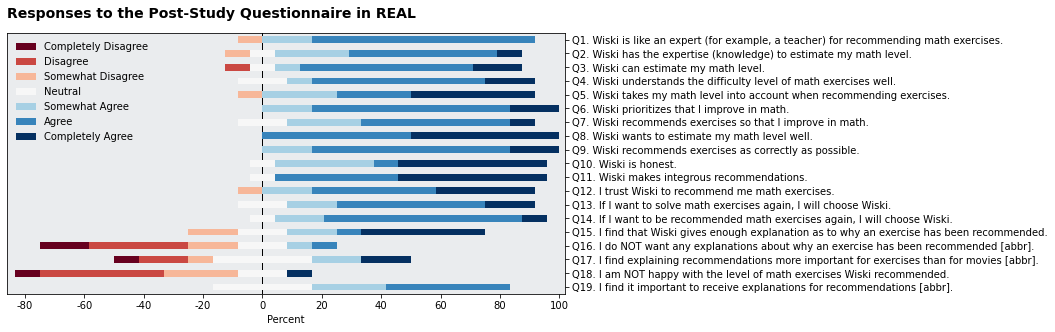

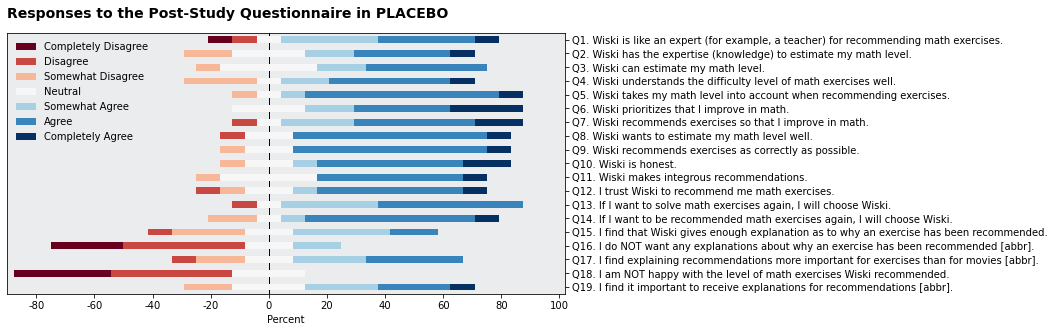

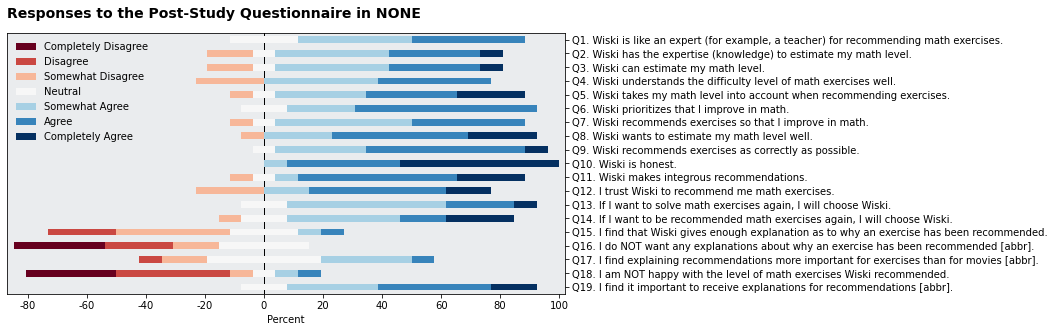

In [41]:
make_divbarchart(real_qa_df,"REAL")
make_divbarchart(placebo_qa_df, "PLACEBO")
make_divbarchart(nothing_qa_df, "NONE")

## Stacked Histograms

In [42]:
def make_stackedhist(data):
    plt.figure(figsize=(10, 6))
    p = sns.color_palette("RdBu", n_colors=7)
    ax = sns.histplot(data=placebo_qa_df, y="Question Number", linewidth=0, hue="Answer", multiple="stack", discrete=1, shrink=0.75, palette=p)
    leg = ["Completely disagree", "Disagree", "Somewhat disagree",
        "Neutral", "Somewhat agree", "Agree", "Completely agree"]
    plt.legend(leg, bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    ax.set(xlabel="Cumulative Number of Students")

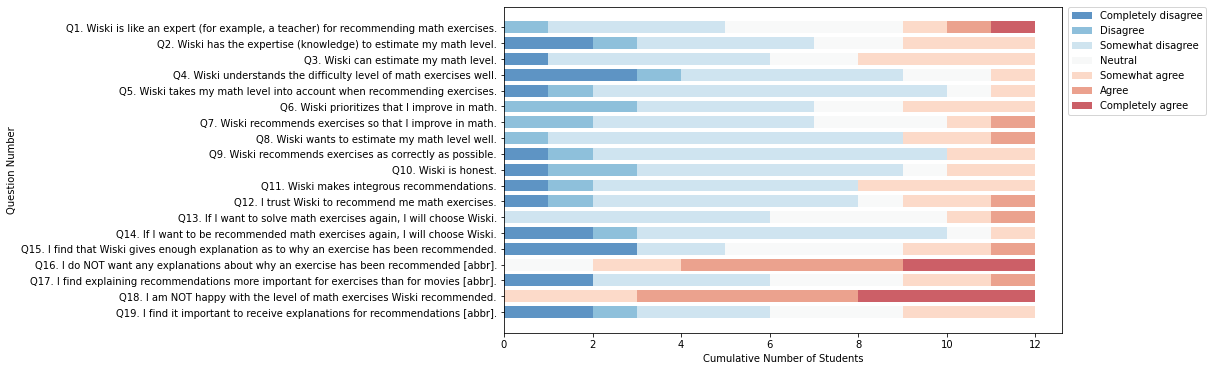

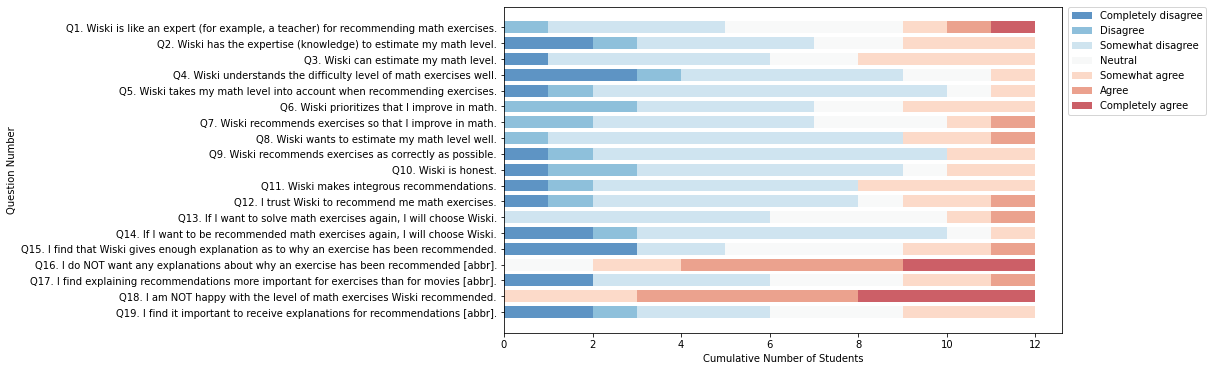

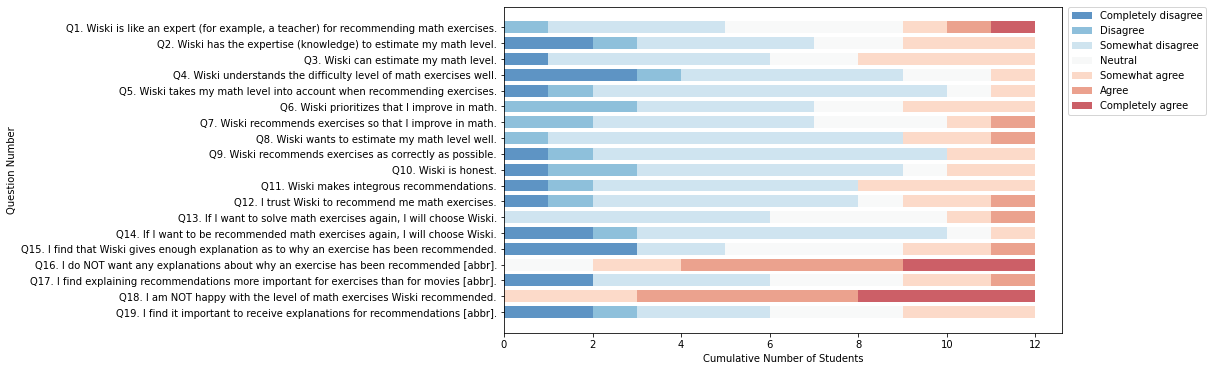

In [43]:
make_stackedhist(real_qa_df)
make_stackedhist(placebo_qa_df)
make_stackedhist(nothing_qa_df)

# BoxPlots

In [44]:
competence_scores_reals = [i/5 for i in list_scores_competence(real_df)]
competence_scores_placebos = [i/5 for i in list_scores_competence(placebo_df)]
competence_scores_nothings = [i/5 for i in list_scores_competence(nothing_df)]
competence_scoress = [competence_scores_reals, competence_scores_placebos, competence_scores_nothings]


benevolence_scores_reals = [i/3 for i in list_scores_benevolence(real_df)]
benevolence_scores_placebos = [i/3 for i in list_scores_benevolence(placebo_df)]
benevolence_scores_nothings = [i/3 for i in list_scores_benevolence(nothing_df)]
benevolence_scoress = [benevolence_scores_reals, benevolence_scores_placebos, benevolence_scores_nothings]


integrity_scores_reals = [i/3 for i in list_scores_integrity(real_df)]
integrity_scores_placebos = [i/3 for i in list_scores_integrity(placebo_df)]
integrity_scores_nothings = [i/3 for i in list_scores_integrity(nothing_df)]
integrity_scoress = [integrity_scores_reals, integrity_scores_placebos, integrity_scores_nothings]


trusting_beliefs_scores_reals = [i/3 for i in list_scores_trusting_beliefs(competence_scores_real, benevolence_scores_real, integrity_scores_real)]
trusting_beliefs_scores_placebos = [i/3 for i in list_scores_trusting_beliefs(competence_scores_placebo, benevolence_scores_placebo, integrity_scores_placebo)]
trusting_beliefs_scores_nothings = [i/3 for i in list_scores_trusting_beliefs(competence_scores_nothing, benevolence_scores_nothing, integrity_scores_nothing)]
trusting_beliefs_scoress = [trusting_beliefs_scores_reals, trusting_beliefs_scores_placebos, trusting_beliefs_scores_nothings]


itr_scores_reals = [i/2 for i in list_scores_intention_to_return(real_df)]
itr_scores_placebos = [i/2 for i in list_scores_intention_to_return(placebo_df)]
itr_scores_nothings = [i/2 for i in list_scores_intention_to_return(nothing_df)]
itr_scoress = [itr_scores_reals, itr_scores_placebos, itr_scores_nothings]

pt_scores_real = list_scores_perceived_transparency(real_df)
pt_scores_placebo = list_scores_perceived_transparency(placebo_df)
pt_scores_nothing = list_scores_perceived_transparency(nothing_df)
pt_scores = [pt_scores_real, pt_scores_placebo, pt_scores_nothing]



explicit_trust_scores_real = list_scores_single_q(real_df, q12)
explicit_trust_scores_placebo = list_scores_single_q(placebo_df, q12)
explicit_trust_scores_nothing = list_scores_single_q(nothing_df, q12)
explicit_trust_scores = [explicit_trust_scores_real, explicit_trust_scores_placebo, explicit_trust_scores_nothing]


md_trust_scores_reals = [i/3 for i in list_scores_md_trust(trusting_beliefs_scores_real, itr_scores_real, pt_scores_real)]
md_trust_scores_placebos = [i/3 for i in list_scores_md_trust(trusting_beliefs_scores_placebo, itr_scores_placebo, pt_scores_placebo)]
md_trust_scores_nothings = [i/3 for i in list_scores_md_trust(trusting_beliefs_scores_nothing, itr_scores_nothing, pt_scores_nothing)]
md_trust_scoress = [md_trust_scores_reals, md_trust_scores_placebos, md_trust_scores_nothings]



q16_scores_real = list_scores_single_q(real_df, q16)
q16_scores_placebo = list_scores_single_q(placebo_df, q16)
q16_scores_nothing = list_scores_single_q(nothing_df, q16)
q16_scores = [q16_scores_real, q16_scores_placebo, q16_scores_nothing]


q17_scores_real = list_scores_single_q(real_df, q17)
q17_scores_placebo = list_scores_single_q(placebo_df, q17)
q17_scores_nothing = list_scores_single_q(nothing_df, q17)
q17_scores = [q17_scores_real, q17_scores_placebo, q17_scores_nothing]


q18_scores_real = list_scores_single_q(real_df, q18)
q18_scores_placebo = list_scores_single_q(placebo_df, q18)
q18_scores_nothing = list_scores_single_q(nothing_df, q18)
q18_scores = [q18_scores_real, q18_scores_placebo, q18_scores_nothing]


q19_scores_real = list_scores_single_q(real_df, q19)
q19_scores_placebo = list_scores_single_q(placebo_df, q19)
q19_scores_nothing = list_scores_single_q(nothing_df, q19)
q19_scores = [q19_scores_real, q19_scores_placebo, q19_scores_nothing]

In [45]:
import seaborn as sns
import matplotlib
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]


In [46]:
def make_boxplot(title, abbrev, abbrev_ending="s"):
    real = ["REAL" for i in range(len(eval(abbrev + "_scores_real")))]
    plac = ["PLACEBO" for i in range(len(eval(abbrev + "_scores_placebo")))]
    nothing = ["NONE" for i in range(len(eval(abbrev + "_scores_nothing")))]
    rg = real + plac + nothing
    val = eval(abbrev + "_scores_real" + abbrev_ending) + eval(abbrev + "_scores_placebo" + abbrev_ending) + eval(abbrev + "_scores_nothing" + abbrev_ending)
    df = pd.DataFrame({"Research Group": rg, "Score": val})
    plt.figure(figsize=(2.3, 3))
    ax = sns.boxplot(y="Score", x="Research Group", data=df,
                    palette=sns.color_palette("pastel"), color=["blue", "green", "red"])
    ax = sns.swarmplot(y="Score", x="Research Group", data=df)
    ax.tick_params(axis="x",length=0)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set(ylim=(0.6, 7.4))
    plt.xlabel("")
    plt.title(title, fontweight="bold")
    plt.gcf().set_facecolor("white")
    plt.savefig("../Images/boxplot_" + abbrev + ".pdf", format="pdf", bbox_inches="tight")

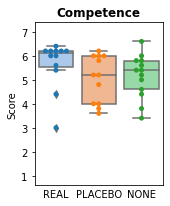

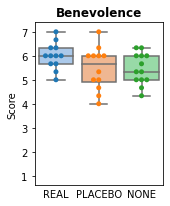

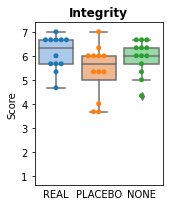

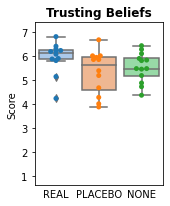

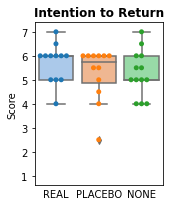

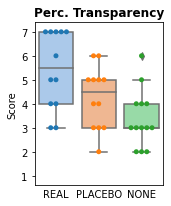

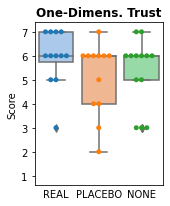

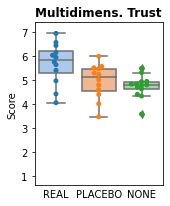

In [47]:
make_boxplot("Competence", "competence")
make_boxplot("Benevolence", "benevolence")
make_boxplot("Integrity", "integrity")
make_boxplot("Trusting Beliefs", "trusting_beliefs")
make_boxplot("Intention to Return", "itr")
make_boxplot("Perc. Transparency", "pt", "")
make_boxplot("One-Dimens. Trust", "explicit_trust", "")
make_boxplot("Multidimens. Trust", "md_trust")

In [48]:
def make_boxplotquestion(n, size=3):
    title="Q"+str(n)
    abbrev="q"+str(n)
    real = ["REAL" for i in range(len(eval(abbrev + "_scores_real")))]
    plac = ["PLACEBO" for i in range(len(eval(abbrev + "_scores_placebo")))]
    nothing = ["NONE" for i in range(len(eval(abbrev + "_scores_nothing")))]
    combined = ["Global" for i in real+plac+nothing]
    rg = real + plac + nothing+combined
    val = eval(abbrev + "_scores_real") + eval(abbrev +
                                                               "_scores_placebo") + eval(abbrev + "_scores_nothing")
    val += val
    df = pd.DataFrame({"Research Group": rg, "Score": val})
    plt.figure(figsize=(3, 3))
    ax = sns.boxplot(y="Score", x="Research Group", data=df,
                     palette=sns.color_palette("pastel"), color=["blue", "green", "red"])
    # ax = sns.swarmplot(y="Score", x="Research Group", data=df, size=size)
    ax.tick_params(axis="x", length=0)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set(ylim=(0.6, 7.4))
    plt.xlabel("")
    plt.title(title, fontweight="bold")
    plt.gcf().set_facecolor("white")
    plt.savefig("../Images/boxplot_" + abbrev + ".pdf", format="pdf", bbox_inches="tight")

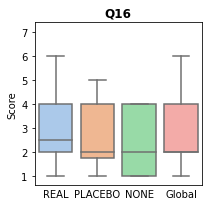

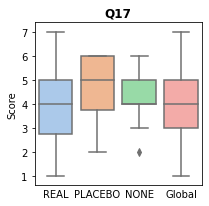

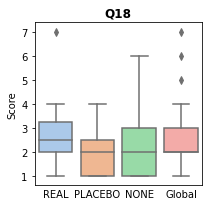

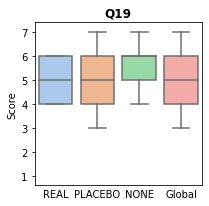

In [49]:
make_boxplotquestion(16)
make_boxplotquestion(17)
make_boxplotquestion(18, 2)
make_boxplotquestion(19, 2)

# Distribution Plots

C:\Users\jeroe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


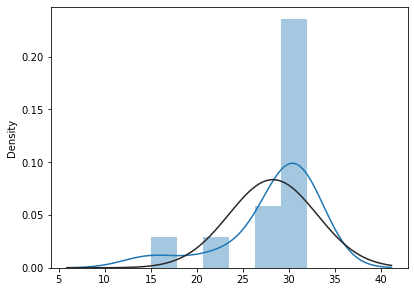

In [50]:
ax = sns.distplot(x=competence_scores_real, fit=scipy.stats.norm)

C:\Users\jeroe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


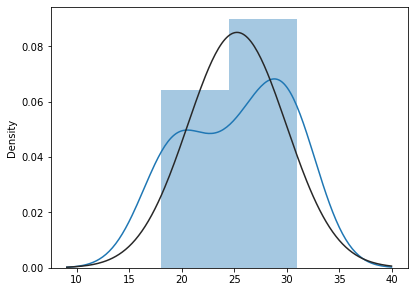

In [51]:
ax = sns.distplot(x=competence_scores_placebo, fit=scipy.stats.norm)

C:\Users\jeroe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


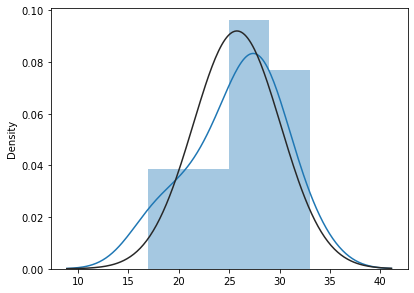

In [52]:
ax = sns.distplot(x=competence_scores_nothing, fit=scipy.stats.norm)

In [53]:
k1, p1 = stats.normaltest(competence_scores_real)
k2, p2 = stats.normaltest(competence_scores_placebo)
k3, p3 = stats.normaltest(competence_scores_nothing)
print([p1,p2,p3])

[0.0006060117701103486, 0.12545444245477566, 0.6330331813795802]


C:\Users\jeroe\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\jeroe\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [54]:
print(trusting_beliefs_scores_real + trusting_beliefs_scores_placebo)

[19.2, 18.533333333333335, 17.6, 20.4, 15.399999999999999, 17.666666666666668, 18.866666666666667, 18.2, 18.533333333333335, 17.4, 18.666666666666668, 12.666666666666668, 17.8, 18.0, 15.533333333333331, 18.0, 17.53333333333333, 12.799999999999999, 20.0, 14.0, 12.0, 16.133333333333333, 17.53333333333333, 11.6]


C:\Users\jeroe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


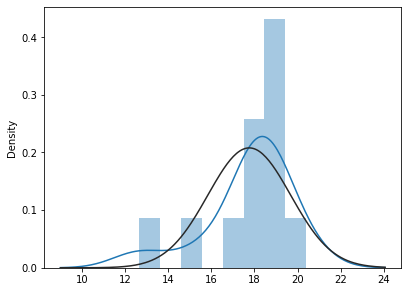

In [55]:
ax = sns.distplot(x=trusting_beliefs_scores_real, fit=scipy.stats.norm)

C:\Users\jeroe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


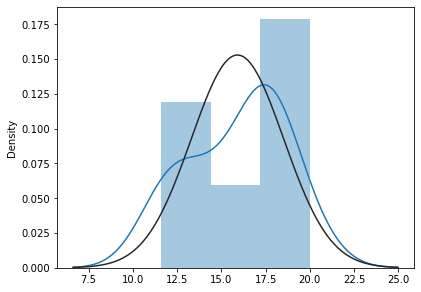

In [56]:
ax = sns.distplot(x=trusting_beliefs_scores_placebo, fit=scipy.stats.norm)

C:\Users\jeroe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


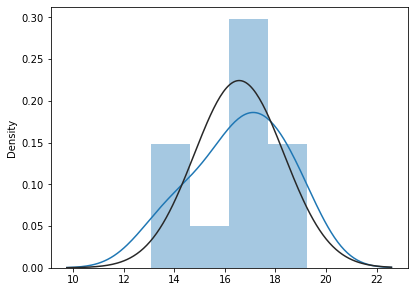

In [57]:
ax = sns.distplot(x=trusting_beliefs_scores_nothing, fit=scipy.stats.norm)

<AxesSubplot:xlabel='Scores', ylabel='Research Group'>

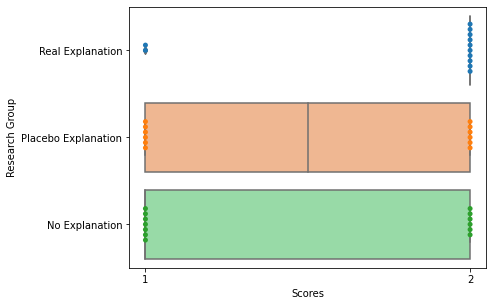

In [58]:
real_tb = ["Real Explanation" for i in range(len(trusting_beliefs_scores_real))]
plac_tb = ["Placebo Explanation" for i in range(len(trusting_beliefs_scores_placebo))]     
nothing_tb = ["No Explanation" for i in range(len(trusting_beliefs_scores_nothing))]        
tb_rg = real_tb + plac_tb + nothing_tb
a = [round(i/77*7) for i in trusting_beliefs_scores_real]
b = [round(i/77*7) for i in trusting_beliefs_scores_placebo]
c = [round(i/77*7) for i in trusting_beliefs_scores_nothing]
tb_val = a+b+c
tb_df = pd.DataFrame({"Research Group": tb_rg, "Scores": tb_val})
ax = sns.boxplot(x="Scores", y="Research Group", data=tb_df, palette=sns.color_palette("pastel"), color=["blue", "green", "red"])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
sns.swarmplot(x="Scores", y="Research Group", data=tb_df)

C:\Users\jeroe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


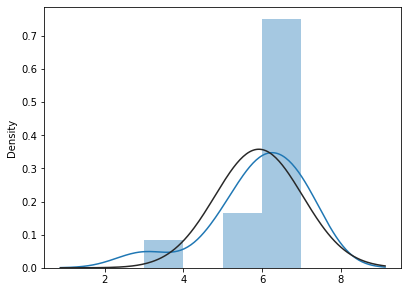

In [59]:
ax = sns.distplot(x=explicit_trust_scores_real, fit=scipy.stats.norm)

C:\Users\jeroe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


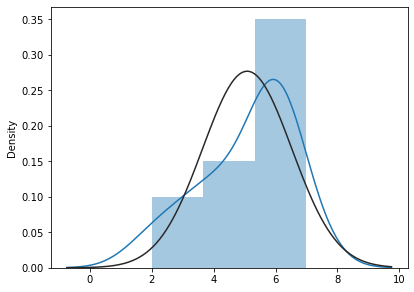

In [60]:
ax = sns.distplot(x=explicit_trust_scores_placebo, fit=scipy.stats.norm)

C:\Users\jeroe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


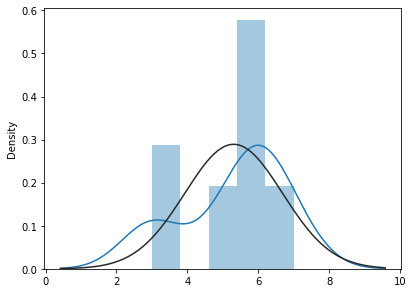

In [61]:
ax = sns.distplot(x=explicit_trust_scores_nothing, fit=scipy.stats.norm)

C:\Users\jeroe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


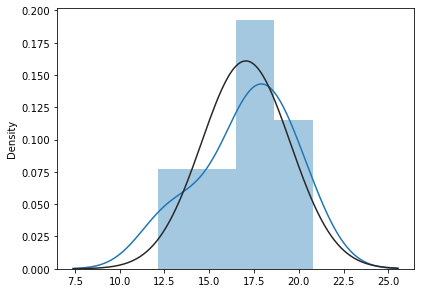

In [62]:
ax = sns.distplot(x=md_trust_scores_real, fit=scipy.stats.norm)

C:\Users\jeroe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


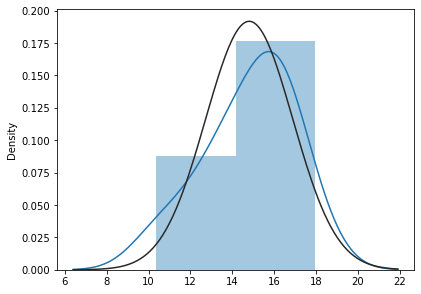

In [63]:
ax = sns.distplot(x=md_trust_scores_placebo, fit=scipy.stats.norm)

C:\Users\jeroe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


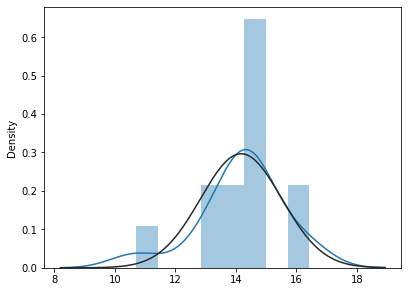

In [64]:
ax = sns.distplot(x=md_trust_scores_nothing, fit=scipy.stats.norm)